<a href="https://colab.research.google.com/github/TairCohen/personal-nutritionist-agent/blob/tair/basic_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [5]:
if IN_COLAB:
    !pip install -q langgraph
    !pip install -q --upgrade langchain-text-splitters langchain-community langgraph
    !pip install -q langchain-openai
    !pip install faiss-cpu>=1.7.4
    !pip install -q langchain

In [230]:
# in jupyter, run this cell to reload the graph_nodes module
# if you make changes to it
# and want to test them without restarting the kernel
import importlib
import graph_nodes
importlib.reload(graph_nodes)

# import image_upload
# importlib.reload(image_upload)

<module 'graph_nodes' from '/Users/tairlax/Desktop/30_hours/personal-nutritionist-agent/graph_nodes.py'>

In [231]:
from IPython.display import Image, display
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START, END
from graph_nodes import State, assistant, upload_image, display_image, identify_food, get_calories

# Define a new graph
workflow = StateGraph(State)
workflow.add_node("assistant", assistant)
workflow.add_node("upload_image", upload_image)
workflow.add_node("display_image", display_image)
workflow.add_node("identify_food", identify_food)
workflow.add_node("get_calories", get_calories)


# Set the entrypoint as conversation
workflow.add_edge(START, "assistant")
workflow.add_edge("assistant", "upload_image")
workflow.add_edge("upload_image", "display_image")
workflow.add_edge("display_image", "identify_food")
workflow.add_edge("identify_food", "get_calories")
workflow.add_edge("get_calories", END)


# Compile
memory = MemorySaver()
graph = workflow.compile(checkpointer=memory) #interrupt_before=["display_image"], 

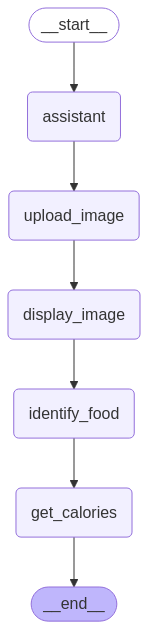

In [227]:
display(Image(graph.get_graph().draw_mermaid_png()))

================================== Ai Message ==================================

Sure! Just let me know the description of the dish, and I'll help you out with the calorie estimate.
Displaying image: download.jpg


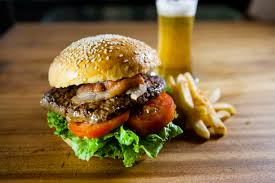

================================== Ai Message ==================================

The image you've provided shows a hamburger with fries. Here's a typical list of ingredients for the dish along with their approximate weights:

1. Hamburger bun (with sesame seeds) - 80 grams
2. Ground beef patty - 120 grams
3. Bacon slice - 20 grams
4. Lettuce leaf - 15 grams
5. Tomato slices (2) - 30 grams
6. French fries - 150 grams

These weights are approximate and can vary depending on the recipe or serving size.
None
To estimate the total calories in the described dish of a hamburger with fries, we'll consider each component separately based on the provided typical weights and the closest matches from a nutritional database:

### Ingredients and Estimated Calories:

1. **Hamburger Bun (with sesame seeds) - 80 grams**
   - Closest database match: assumingly similar to a typical hamburger bun.
   - Estimated calories: Approximately 250 kcal per 100 grams for a generic hamburger bun.
   - Calculated 

In [232]:
config = {"configurable": {"thread_id": "1"}}
# input_message = HumanMessage(content="hi! I'm Lance")
# output = graph.invoke({"messages": [input_message]}, config)
output = graph.invoke({}, config)